In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [2]:
df=pd.read_csv('Walmart_Sales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
X=df.drop(columns=['Weekly_Sales','Date'],axis=1)
y=df['Weekly_Sales']

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

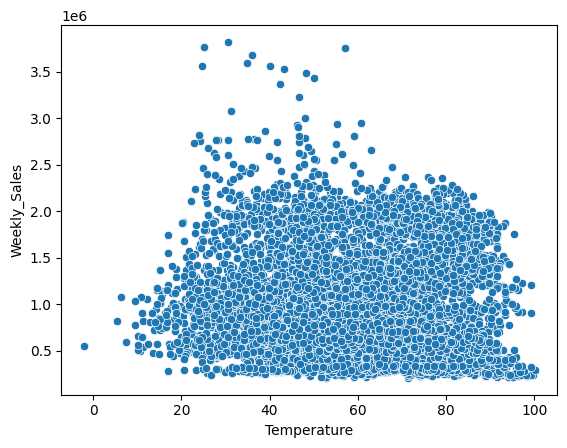

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8,random_state=42)
sns.scatterplot(data=df,x='Temperature',y='Weekly_Sales')

In [9]:
model=LinearRegression()
std=StandardScaler()
std1=std.fit_transform(xtrain)
stdt=std.transform(xtest)
model.fit(std1,ytrain)
model.score(stdt,ytest)

0.148063534059508

In [ ]:
poly=PolynomialFeatures(degree=9)
x_poly=poly.fit_transform(std1)
xt_poly=poly.transform(stdt)
model.fit(x_poly,ytrain)
model.score(x_poly,ytrain)

0.9630817058953524

In [25]:
r2_score(ytest,model.predict(xt_poly))

-5609.525498610725